<a href="https://colab.research.google.com/github/Krupa049/ANN/blob/main/ANN_ML_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

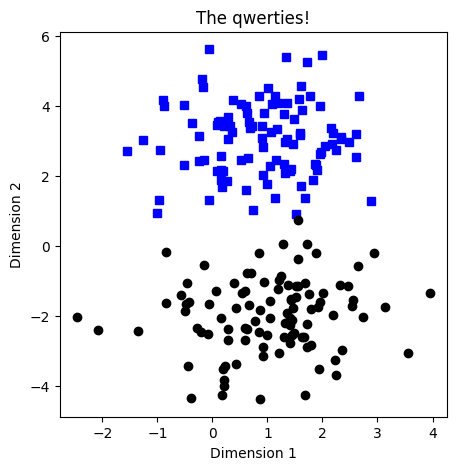

In [11]:
nPerClust = 100
blur = 1

A = [ 1,  3 ]
B = [ 1, -2 ]

# Generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# True labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# Concatanate into a matrix
data_np = np.hstack((a,b)).T

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [12]:
def createANNmodel(learningRate):

  # Model architecture
  ANNclassify = nn.Sequential(
        nn.Linear(2,16),     # Input Layer
        # nn.ReLU(),           # Activation Unit
        nn.Linear(16,1),     # Hidden Layer
        # nn.ReLU(),           # Activation Unit
        nn.Linear(1,1),      # Output Unit
        nn.Sigmoid(),        # Final Activation Unit
        )

  # Loss Function
  lossfun = nn.BCELoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # Model output
  return ANNclassify,lossfun,optimizer

In [13]:
numepochs = 1000

def trainTheModel(ANNmodel):

  # Initializing the losses
  losses = torch.zeros(numepochs)

  # looping over epochs
  for epochi in range(numepochs):

    # Forward pass
    yHat = ANNmodel(data)

    # Compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Final forward pass
  predictions = ANNmodel(data)

  totalacc = 100*torch.mean(((predictions>.5) == labels).float())

  return losses,predictions,totalacc

Final accuracy: 99.5%


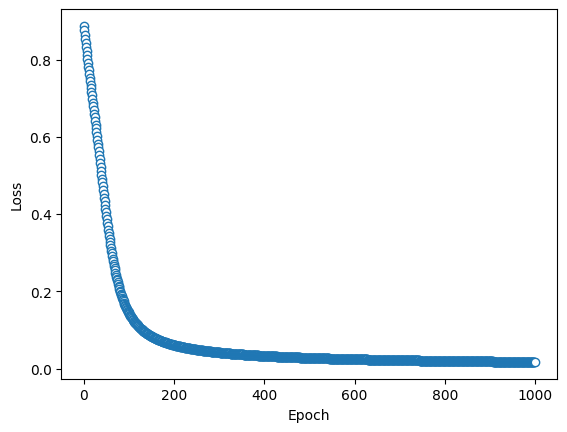

In [14]:
ANNclassify,lossfun,optimizer = createANNmodel(.01)

losses,predictions,totalacc = trainTheModel(ANNclassify)

print('Final accuracy: %g%%' %totalacc)

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
learningrates = np.linspace(.001,.1,50)

accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

for i,lr in enumerate(learningrates):

  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

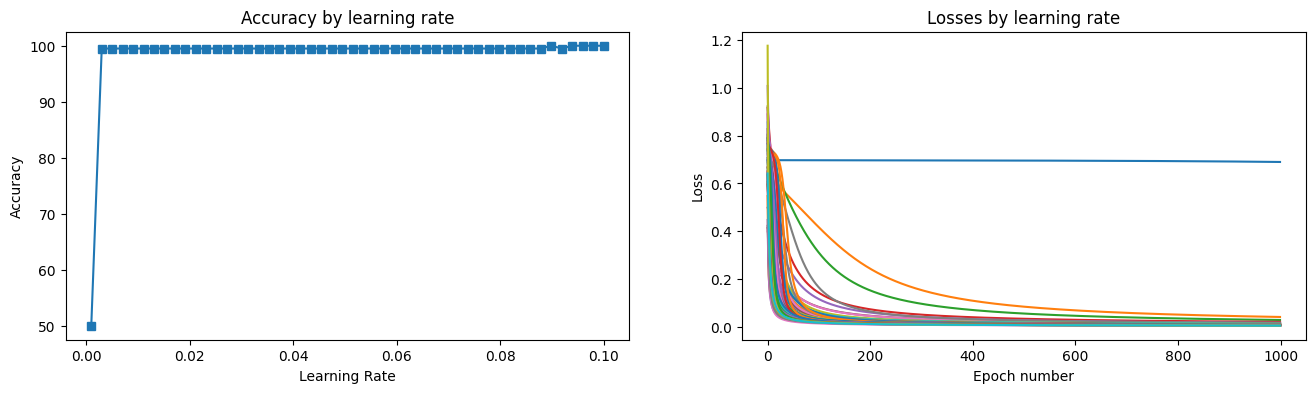

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [17]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9800)

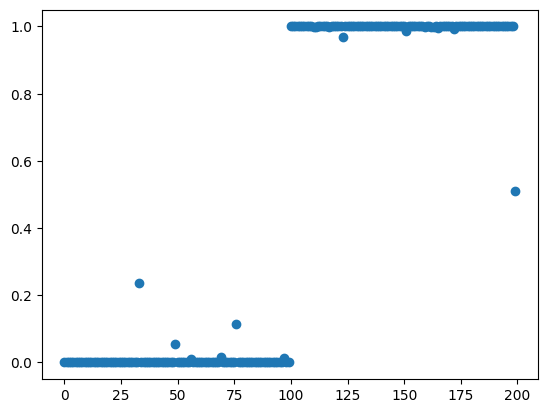

In [18]:
plt.plot(predictions.detach(),'o')